In [ ]:
# File name convention
# R_ = raw extract 
# T_ = tranformed raw data 
# C_ = enriched layer with calculation
# I = insights layer, designed for model baselines
# V_ = validation

In [1]:
import pandas as pd
# DF_YFIN_INFO = pd.read_csv (r'/Users/joezhou/Downloads/R_ALL_INFO.csv',sep='|') 
#Create a sample for code testing purposes

DF_YFIN_INFO1 = pd.read_csv (r'/Users/joezhou/Downloads/R_ALL_INFO_1.csv',sep='|') 
DF_YFIN_INFO2 = pd.read_csv (r'/Users/joezhou/Downloads/R_ALL_INFO_2.csv',sep='|') 
DF_YFIN_INFO3 = pd.read_csv (r'/Users/joezhou/Downloads/R_ALL_INFO_3.csv',sep='|') 
DF_YFIN_INFO4 = pd.read_csv (r'/Users/joezhou/Downloads/R_ALL_INFO_4.csv',sep='|') 

DF_YFIN_INFO = pd.concat([DF_YFIN_INFO1, DF_YFIN_INFO2, DF_YFIN_INFO3, DF_YFIN_INFO4], ignore_index=True)

In [6]:
 list(DF_YFIN_INFO.columns).print()


AttributeError: 'list' object has no attribute 'print'

In [4]:
# Only keep columns needed, selected after manual review

DF_YFIN_INFO_SUBSET = DF_YFIN_INFO[[
# Price / volume Movement	
'52WeekChange','fiftyDayAverage','fiftyTwoWeekHigh','fiftyTwoWeekLow','averageDailyVolume10Day','averageVolume10days',
#Location	
'address1','address2','city','state','country','zip','exchange',
# Dividend	
'dividendRate','dividendYield','exDividendDate','payoutRatio','trailingAnnualDividendRate','trailingAnnualDividendYield',
# Timing	
'mostRecentQuarter','lastFiscalYearEnd','lastSplitDate','nextFiscalYearEnd',
# Fundamentals	
'open','marketCap','sharesOutstanding','floatShares','bookValue','regularMarketPrice','regularMarketVolume','heldPercentInsiders','heldPercentInstitutions',
# Performance	
'earningsQuarterlyGrowth','netIncomeToCommon','beta','enterpriseToEbitda','enterpriseToRevenue','enterpriseValue','priceToBook','priceToSalesTrailing12Months','profitMargins','trailingEps','trailingPE','fullTimeEmployees',
# Future dated	
'forwardEps','forwardPE',
# Company Identifier	
'symbol','shortName','longName',
# 'longBusinessSummary','website','messageBoardId',
# Index Grouping	
'industry','sector'
]]

DF_YFIN_INFO_SUBSET = DF_YFIN_INFO_SUBSET.rename(columns={"symbol": "TickName"})


In [5]:
#Export version for Tableau

DF_YFIN_INFO_SUBSET.to_csv('/Users/joezhou/Downloads/T_ALL_INFO_FEATURES.csv', sep='|', index=False)


In [ ]:
# End of data engineering


# Some analysis modules below

In [4]:

DF_YFIN_INFO_SUBSET2 = DF_YFIN_INFO_SUBSET.drop(columns=[
'address1',
'address2',
'city',
# 'state',
# 'country',
# 'zip',
'exchange',
'mostRecentQuarter',
'lastFiscalYearEnd',
'lastSplitDate',
'nextFiscalYearEnd',
'shortName',
'longName',
'longBusinessSummary',
'website',
'messageBoardId'
# 'industry',
# 'sector'
])

# DF_YFIN_INFO_SUBSET_NUMS2.describe(include='all')




In [5]:
# Create distribution chart for variables to further reduce dataset
import seaborn as sns

# iteration verions
# for VAR_COLUMN in DF_YFIN_INFO_SUBSET_NUMS:
    # sns.displot(DF_YFIN_INFO_SUBSET_NUMS.dropna(), x=VAR_COLUMN)

#faster version
# sns.pairplot(DF_YFIN_INFO_SUBSET_NUMS)


In [6]:

DF_YFIN_INFO_BASE = DF_YFIN_INFO_SUBSET2[['dividendRate',
'heldPercentInstitutions',
'beta',
'profitMargins',
'trailingPE',
'sector','state']]


<AxesSubplot:xlabel='heldPercentInstitutions', ylabel='dividendRate'>

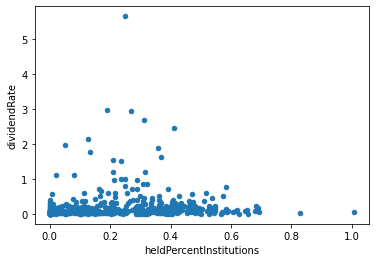

In [7]:
# create relationship scatter plot
# DF_YFIN_INFO_BASE.describe()

import matplotlib.pyplot as plt

DF_YFIN_INFO_BASE.plot('heldPercentInstitutions','dividendRate',kind = 'scatter')
# DF_YFIN_INFO_BASE.plot('trailingPE','profitMargins',kind = 'scatter')


In [8]:
#Split into category vs continous features
categorical_features = DF_YFIN_INFO_BASE[['sector','state']]
continuous_features = DF_YFIN_INFO_BASE[['dividendRate',
'heldPercentInstitutions',
'beta',
'profitMargins',
'trailingPE']]

data = DF_YFIN_INFO_BASE

# convert categories to numeric
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

# Standardise data
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)
